In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.base import ClassNamePrefixFeaturesOutMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data_train = pd.read_csv('/home/the_rogue/Python_Project/Python_DataSets_file_/train.csv')

data_test = pd.read_csv('/home/the_rogue/Python_Project/Python_DataSets_file_/test.csv')

In [3]:
pd.set_option('display.max_columns', 100) # display 100 columns
pd.set_option('display.max_rows', 100) # display 100 lines

### EDA

In [4]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data_train.shape, data_test.shape

((1460, 81), (1459, 80))

In [6]:
data_train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
data_train['PoolArea'].unique()

array([  0, 512, 648, 576, 555, 480, 519, 738])

In [8]:
data_train[data_train['PoolArea'] == 0].shape

(1453, 81)

In [9]:
data_train[data_train['PoolArea'] == 0]['PoolQC'].unique()

array([nan], dtype=object)

In [10]:
data_train['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [11]:
data_train.groupby('PoolQC')['PoolArea'].count()

PoolQC
Ex    2
Fa    2
Gd    3
Name: PoolArea, dtype: int64

In [12]:
### all nan can be filled out as none_pool
data_train['PoolQC'] = data_train['PoolQC'].fillna('none_pool')

In [13]:
data_train[data_train['TotalBsmtSF'] == 0].shape

(37, 81)

In [14]:
data_train['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [15]:
data_train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [16]:
data_train['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [17]:
data_train[data_train['BsmtExposure'] == 'No']['TotalBsmtSF'].unique()

array([ 856,  756,  796,  952,  991, 1040, 1175,  912, 1253,  832, 1004,
       1114, 1029,  637, 1777, 1566, 1704,  520,  649, 1228, 1398, 1561,
       1097, 1297, 1057, 1088, 1150, 1752, 1434,  736,  955,  816,  384,
       1425,  970,  860, 1158,  530,  576,  747, 1304,  845, 1086,  840,
        672, 1768,  440,  896, 1237, 1563, 1065, 1288, 1013,  990, 1235,
        876,  824,  680,  960,  458,  950,  741, 1226, 1053,  641,  789,
        793, 1844,  994, 1028,  729, 1092, 1125,  728,  732, 1080, 1199,
       1362, 1078,  660, 1008,  924,  992, 1063, 1267, 1461, 1214, 1907,
        928,  864,  910, 1728,  715,  884,  825, 1200,  572,  774, 1232,
        882,  644, 1617, 1582, 1686,  720, 1064, 1606, 1151, 1052, 2216,
        968,  504,  853,  725,  855, 1726, 1360,  755, 1121, 1196,  617,
       1424, 1140, 1100,  900,  689, 1070,  686,  798, 1010,  713,  630,
       1203,  483, 1194, 1462,  996, 1694,  735,  540,  626,  948, 1020,
       1367, 1314,  975, 1604,  963, 1482,  926, 14

In [18]:
data_train[data_train['TotalBsmtSF'] == 0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,none_pool,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,none_pool,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,none_pool,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,none_pool,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,none_pool,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,none_pool,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,none_pool,NaN,NaN,0,12,2008,WD,Normal,97000
342,343,90,RL,NaN,8544,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,none_pool,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,none_pool,NaN,NaN,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.0,17120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1.5Fin,4,4,1959,1959,Gable,CompShg,WdShing,Plywood,NaN,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SB

In [19]:
data_train['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [20]:
data_train.query("BsmtQual == 'Gd' and BsmtCond == 'TA' and BsmtFinType1 == 'Unf' and TotalBsmtSF == 936")['BsmtExposure'].unique()

array([nan, 'No'], dtype=object)

In [21]:
data_train.query("BsmtQual == 'Gd' and BsmtCond == 'TA' and BsmtFinType1 == 'Unf' and TotalBsmtSF == 936").shape

(2, 81)

In [22]:
### change nan to No

data_train.loc[(
    (data_train['BsmtQual'] == 'Gd') &
     (data_train['BsmtCond' ] == 'TA') &
    (data_train['BsmtFinType1' ] == 'Unf') &
    (data_train['TotalBsmtSF' ] == 936)
    ), ['BsmtExposure']] = (
        data_train.loc[(
    (data_train['BsmtQual'] == 'Gd') &
     (data_train['BsmtCond' ] == 'TA') &
    (data_train['BsmtFinType1' ] == 'Unf') &
    (data_train['TotalBsmtSF' ] == 936)
    ), ['BsmtExposure']].fillna('No')
    )

In [23]:
data_train[data_train['BsmtExposure'].isna()].shape

(37, 81)

In [24]:
data_train.groupby('BsmtExposure')['BsmtQual'].count()

BsmtExposure
Av    221
Gd    134
Mn    114
No    954
Name: BsmtQual, dtype: int64

In [25]:
data_train[data_train['TotalBsmtSF'] == 0].groupby('BsmtExposure')['BsmtQual'].count()

Series([], Name: BsmtQual, dtype: int64)

In [26]:
### no basement because TotalBsmtSF = 0

data_train['BsmtExposure'] = data_train['BsmtExposure'].fillna('deny')

In [27]:
data_train[data_train['BsmtFinType2'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,Slab,NaN,NaN,deny,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,none_pool,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NaN,0.0,TA,TA,PConc,NaN,NaN,deny,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,none_pool,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,Slab,NaN,NaN,deny,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,none_pool,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,Fa,Slab,NaN,NaN,deny,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,none_pool,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,NaN,NaN,deny,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,none_pool,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,deny,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,none_pool,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,PConc,NaN,NaN,deny,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,none_pool,NaN,NaN,0,12,2008,WD,Normal,97000
332,333,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,none_pool,NaN,NaN,0,10,2009,WD,Normal,284000
342,343,90,RL,NaN,8544,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,deny,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,none_pool,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,deny,NaN,0,NaN,0,0,

In [28]:
data_train.query("BsmtQual == 'Gd' and BsmtCond == 'TA' and BsmtExposure == 'No' and BsmtFinType1 == 'GLQ' and TotalBsmtSF == 3206")['BsmtFinType2'].unique()

array([nan], dtype=object)

In [29]:
data_train['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [30]:
data_train[data_train['BsmtFinType2']== 'Unf'].shape

(1256, 81)

In [31]:
data_train.query("BsmtFinType2 == 'Unf' and TotalBsmtSF != 0").shape

(1256, 81)

In [32]:
### just no 2nd floor

data_train['BsmtFinType2'] = data_train['BsmtFinType2'].fillna('deny')

In [33]:
data_train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure        0
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [34]:
data_train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [35]:
data_train.groupby('BsmtQual')['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [36]:
### fill in the height of the basement in the lines with zero area of the basement 'Zero'

data_train['BsmtQual'] = data_train['BsmtQual'].fillna('Zero')

In [37]:
data_train['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [38]:
### general condition of the basement when he is miss

data_train['BsmtCond'] = data_train['BsmtCond'].fillna('deny')

In [39]:
data_train['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [40]:
data_train[data_train['TotalBsmtSF'] == 0]['BsmtFinType1'].unique()

array([nan], dtype=object)

In [41]:
data_train['BsmtFinType1'] = data_train['BsmtFinType1'].fillna('deny')

In [42]:
data_train.groupby('GarageType')['GarageCars'].count()

GarageType
2Types       6
Attchd     870
Basment     19
BuiltIn     88
CarPort      9
Detchd     387
Name: GarageCars, dtype: int64

In [43]:
data_train[data_train['GarageArea'] == 0].shape

(81, 81)

In [44]:
data_train['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [45]:
### year of construction change nan to -9999

data_train['GarageYrBlt'] = data_train['GarageYrBlt'].fillna(-9999)

In [46]:
data_train['GarageType'] = data_train['GarageType'].fillna('No_garage')

In [47]:
data_train['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [48]:
data_train.groupby('GarageFinish')['GarageType'].count()

GarageFinish
Fin    352
RFn    422
Unf    605
Name: GarageType, dtype: int64

In [49]:
### change nan to Unf(unfinished)

data_train['GarageFinish'] = data_train['GarageFinish'].fillna('Unf')

In [50]:
data_train['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [51]:
data_train.groupby('GarageQual')['GarageFinish'].count()

GarageQual
Ex       3
Fa      48
Gd      14
Po       3
TA    1311
Name: GarageFinish, dtype: int64

In [52]:
data_train['GarageQual'] = data_train['GarageQual'].fillna('No_garage')

In [53]:
data_train['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [54]:
data_train.groupby('GarageCond')['GarageFinish'].count()

GarageCond
Ex       2
Fa      35
Gd       9
Po       7
TA    1326
Name: GarageFinish, dtype: int64

In [55]:
data_train['GarageCond'] = data_train['GarageCond'].fillna('No_garage')

In [56]:
data_train['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [57]:
data_train.groupby('Fence')['LotArea'].count()

Fence
GdPrv     59
GdWo      54
MnPrv    157
MnWw      11
Name: LotArea, dtype: int64

In [58]:
data_train.groupby('Fireplaces')['LotArea'].count()

Fireplaces
0    690
1    650
2    115
3      5
Name: LotArea, dtype: int64

In [59]:
data_train[data_train['Fireplaces'] == 0]['FireplaceQu'].unique()

array([nan], dtype=object)

In [60]:
data_train[data_train['Fireplaces'] == 0].shape

(690, 81)

In [61]:
data_train[data_train['FireplaceQu'].isna()].shape

(690, 81)

In [62]:
data_train['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [63]:
### Let's fill in the blanks with the value there is no fireplace at all,
### because of quantity is zero 'No_Fpl'

data_train['FireplaceQu'] = data_train['FireplaceQu'].fillna('No_Fpl')

In [64]:
data_train['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [65]:
data_train.groupby('MasVnrType')['FireplaceQu'].count()

MasVnrType
BrkCmn      15
BrkFace    445
Stone      128
Name: FireplaceQu, dtype: int64

In [66]:
data_train[data_train['MasVnrType'].isna()]['MasVnrArea']

1       0.0
3       0.0
5       0.0
8       0.0
9       0.0
       ... 
1454    0.0
1455    0.0
1457    0.0
1458    0.0
1459    0.0
Name: MasVnrArea, Length: 872, dtype: float64

In [67]:
data_train['MasVnrType'] = data_train['MasVnrType'].fillna('None')

In [68]:
data_train['MasVnrArea'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MasVnrArea
Non-Null Count  Dtype  
--------------  -----  
1452 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [69]:
data_train.groupby('MasVnrType')['MasVnrArea'].mean()

MasVnrType
BrkCmn     247.666667
BrkFace    259.008989
None         1.094907
Stone      239.304688
Name: MasVnrArea, dtype: float64

In [70]:
data_train[data_train['MasVnrType'] == 'None']['MasVnrArea'].mean()

1.0949074074074074

In [71]:
data_train['MasVnrArea'] = data_train['MasVnrArea'].fillna(
    data_train[data_train['MasVnrType'] == 'None']['MasVnrArea'].mean()
    )

In [72]:
data_train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [73]:
data_train[data_train['LotFrontage'] == 0].shape

(0, 81)

In [74]:
data_train[data_train['LotFrontage'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,none_pool,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,No_Fpl,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,none_pool,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,none_pool,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,none_pool,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,none_pool,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1981,1981,Gable,CompShg,MetalSd,MetalSd,BrkFace,310.0,Gd,Gd,CBlock,Gd,TA,No,BLQ,678,Unf,0,762,1440,GasA,Ex,Y,SBrkr,1440,0,0,1440,0,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1981.0,Fin,2,467,TA,TA,Y,0,0,99,0,0,0,none_pool,NaN,NaN,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,6,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,LwQ,958,Unf,0,0,958,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,0,No_Fpl,Attchd,1976.0,RFn,2,440,TA,TA,Y,0,60,0,0,0,0,none_pool,NaN,NaN,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,147.0,Gd,TA,PConc,Gd,TA,Av,GLQ,697,Unf,0,151,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,1,TA,Attchd,2004.0,RFn,2,420,TA,TA,Y,149,0,0,0,0,0,none_pool,NaN,NaN,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,

In [75]:
data_train['LotFrontage'].sort_values()

232     21.0
837     21.0
235     21.0
1029    21.0
1038    21.0
        ... 
1429     NaN
1431     NaN
1441     NaN
1443     NaN
1446     NaN
Name: LotFrontage, Length: 1460, dtype: float64

In [76]:
data_train['LotFrontage'] = data_train['LotFrontage'].fillna(0)

In [77]:
data_train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [78]:
data_train.groupby('Electrical')['LotFrontage'].count()

Electrical
FuseA      94
FuseF      27
FuseP       3
Mix         1
SBrkr    1334
Name: LotFrontage, dtype: int64

In [79]:
data_train['Electrical'] = data_train['Electrical'].fillna('unnown')

In [80]:
data_train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [81]:
### copy our dataset becouse it can healp in future and drop not important columns

df_train = data_train.copy(deep=True)

df_train.drop(columns = ['Alley', 'Fence', 'MiscFeature', 'Id'], axis = 1, inplace=True)

df_test = data_test.copy(deep=True)

df_test.drop(columns = ['Alley', 'Fence', 'MiscFeature', 'Id'], axis = 1, inplace=True)


Lest find and create some features for our model

In [82]:
oe = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = np.nan)

In [83]:
object_col_data = [col for col in df_train.columns if df_train[col].dtypes == 'O']

number_col_data = [col for col in df_train.columns if df_train[col].dtypes != 'O']

In [84]:
oe.fit(df_train[object_col_data])

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=nan)

In [85]:
ohe_data = pd.concat([df_train[number_col_data],
                              pd.DataFrame(oe.transform(df_train[object_col_data]),
                                            columns=oe.get_feature_names_out())],
                              axis=1)

In [86]:
### Removing duplicate features

def get_duplicates(X):
  """
  Serch duplicates in feachers
  X - DataFrame
  """

  pairs = {}
  dups = []

  # Enumerate all columns, external
  for i in range(X.shape[1]):
    # текущая колонка
    feat_outer = X.columns[i]

    # if the current column is not a duplicate
    if feat_outer not in dups:

      # create an entry in the dictionary, the column is the key
      pairs[feat_outer] = []

      # enumerate the remaining columns (internal)
      for feat_inner in X.columns[i+1:]:

        # if the columns are identical
        if X[feat_outer].equals(X[feat_inner]):

          # adding to dictionary and list of duplicates
          pairs[feat_outer].append(feat_inner)
          dups.append(feat_inner)


  return pairs

In [87]:
### checking which columns are duplicates and whether they exist
dic = []
for x in list(get_duplicates(ohe_data).values()):
  if x != []:
    dic.append(x)

dic

[]

In [88]:
### remove constant and pseudo-constant attributes

from sklearn.feature_selection import VarianceThreshold
from sklearn.base import ClassNamePrefixFeaturesOutMixin

sellector = VarianceThreshold(threshold=0.15)

In [89]:
sellector.fit(ohe_data)

VarianceThreshold(threshold=0.15)

In [90]:
ohe_data = pd.DataFrame(sellector.transform(ohe_data), columns=sellector.get_feature_names_out())

### Target_Analysys

In [91]:
ohe_data.corr().loc[['SalePrice']]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
SalePrice,-0.084284,0.209624,0.263843,0.790982,-0.077856,0.522897,0.507101,0.472647,0.38642,-0.011378,0.214479,0.613581,0.605852,0.319334,-0.025606,0.708624,0.227122,0.560664,0.284108,0.168213,0.533723,0.466929,0.240936,0.640409,0.623431,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.02119,0.046432,-0.028923,1.0,-0.166872,-0.25558,0.015453,-0.067396,0.210851,0.091155,-0.085591,0.180163,0.222405,0.132383,0.103551,0.103766,0.018216,-0.636884,0.117303,0.382479,-0.620886,0.015058,-0.309314,-0.103114,0.008041,-0.400178,0.234716,-0.589189,0.115328,-0.097176,-0.415283,-0.537242,0.205963,0.246705,0.231357,-0.054911,0.213092


In [92]:
ohe_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [93]:
import statsmodels.api as sm

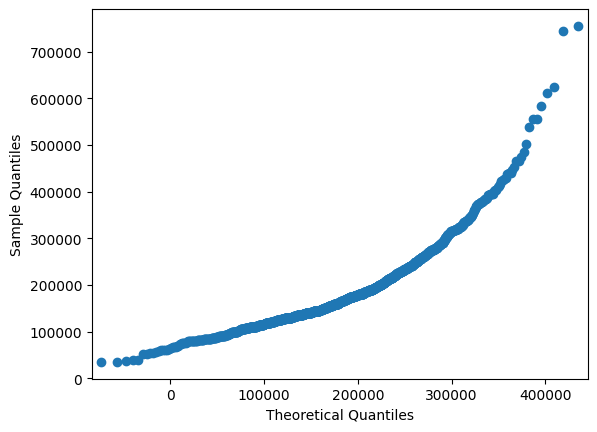

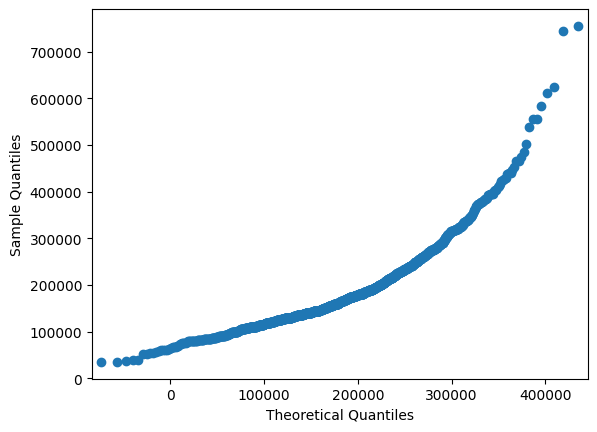

In [94]:
sm.qqplot(ohe_data['SalePrice'], loc=ohe_data['SalePrice'].mean(), scale=ohe_data['SalePrice'].std())

we see a small tail, so let’s try to get rid of it using the logarithm and get a normal distribution

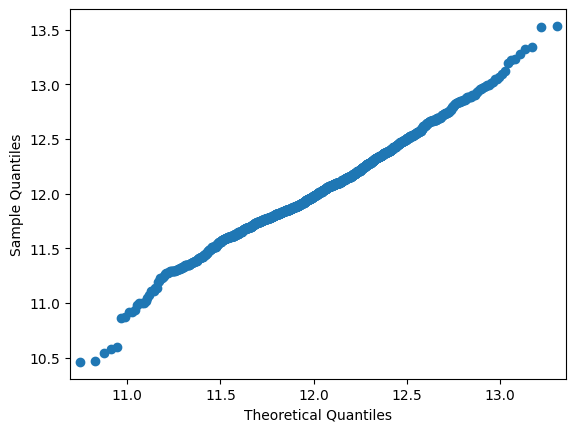

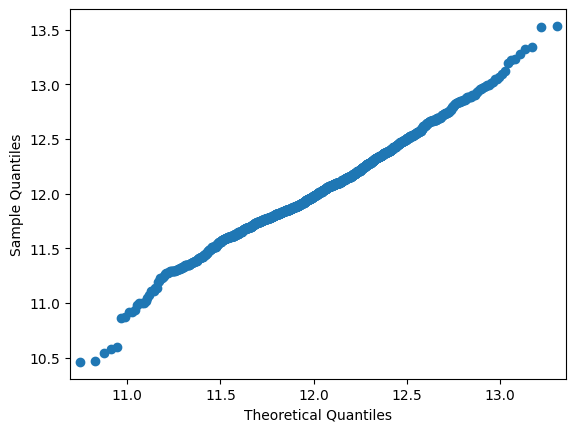

In [95]:
sm.qqplot(np.log(ohe_data['SalePrice']), loc=np.log(ohe_data['SalePrice']).mean(), scale=np.log(ohe_data['SalePrice']).std())

We see that this is much better, so let’s change our target variable a little

In [96]:
ohe_data['target_log'] = np.log(ohe_data['SalePrice'])
data_train['target_log'] = np.log(data_train['SalePrice'])

In [97]:
ohe_data.shape

(1460, 69)

In [98]:
ohe_data = ohe_data.query('target_log >= 10.8 and target_log <= 13.4')

In [99]:
ohe_data.shape

(1453, 69)

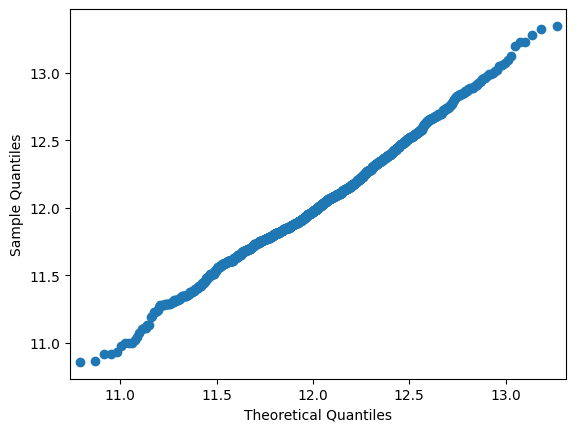

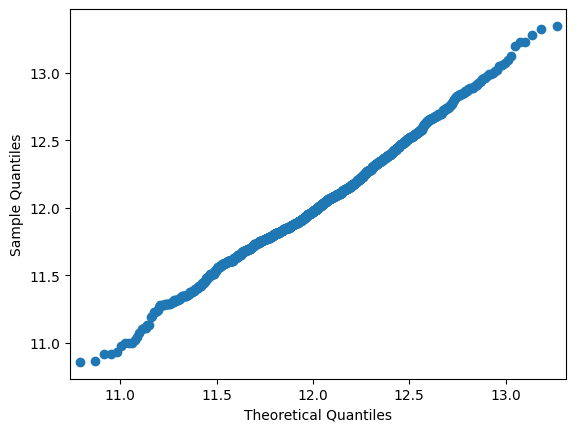

In [100]:
sm.qqplot(ohe_data['target_log'], loc=ohe_data['target_log'].mean(), scale=ohe_data['target_log'].std())

### Scan strong corr

In [101]:
### Formation of a dataframe with strong correlations

def make_corr_df(df:pd.DataFrame, min_corr:float = 0.8, max_corr:float = 1):
  """
  df - dataframe in which we calculate the correlation
  min_corr - minimum correlation
  max_corr - maximum correlation

  """
  cr = df.corr()
  cr = cr.abs().unstack()
  cr = cr.sort_values(ascending=False)
  cr = cr[cr >= min_corr]
  cr = cr[cr < max_corr]
  cr = pd.DataFrame(cr).reset_index()
  cr.columns = ['f1', 'f2', 'corr']
  return cr

In [102]:
ohe_data.shape, df_train.shape

((1453, 69), (1460, 77))

In [103]:
make_corr_df(ohe_data.drop(['SalePrice', 'target_log'], axis= 1))

,f1,f2,corr
0,GarageArea,GarageCars,0.880639
1,GarageCars,GarageArea,0.880639
2,Exterior1st,Exterior2nd,0.853765
3,Exterior2nd,Exterior1st,0.853765
4,GrLivArea,TotRmsAbvGrd,0.828055
5,TotRmsAbvGrd,GrLivArea,0.828055
6,1stFlrSF,TotalBsmtSF,0.815783
7,TotalBsmtSF,1stFlrSF,0.815783


In [104]:
### Detection of groups of correlated features

def corr_groups(cr):
  grouped_feature_list = []
  correlated_groups = []

  for feature in cr['f1'].unique():
    if feature not in grouped_feature_list:
      # Finding correlating features
      correlated_block = cr[cr['f1'] == feature]
      cur_dups = list(correlated_block['f2'].unique()) + [feature]
      grouped_feature_list = grouped_feature_list + cur_dups
      correlated_groups.append(cur_dups)
  return correlated_groups

In [105]:
corr_groups(
    make_corr_df(ohe_data.drop(['SalePrice', 'target_log'], axis= 1))
)

[['GarageCars', 'GarageArea'],
 ['Exterior2nd', 'Exterior1st'],
 ['TotRmsAbvGrd', 'GrLivArea'],
 ['TotalBsmtSF', '1stFlrSF']]

In [106]:
### searching for the worst features of a pair that correlate with the target

def best_target_corr(cor_data, cor_groups, target):
  col_ = []
  for x in range(len(list(cor_groups))):
    for y in range(len(list(cor_groups[x])) -1):
      if abs(cor_data.loc[[target]][list(cor_groups[x])[y]].values[0]) > abs(cor_data.loc[[target]][list(cor_groups[x])[y+1]].values[0]):
        col_.append(list(cor_groups[x])[y+1])
      else:
        col_.append(list(cor_groups[x])[y])
  return col_

In [107]:
worst_fech = best_target_corr(
    cor_data = ohe_data.drop('SalePrice', axis= 1).corr(),
    cor_groups = corr_groups(
                  make_corr_df(ohe_data.drop(['SalePrice', 'target_log'], axis= 1))
                            ),
    target = 'target_log'
    )

In [108]:
worst_fech

['GarageArea', 'Exterior1st', 'TotRmsAbvGrd', '1stFlrSF']

In [109]:
ohe_data.drop(columns = worst_fech, axis = 1, inplace=True)

In [110]:
model_train = data_train[list(ohe_data.columns)]

### test data!!!!!
model_test = data_test[list(ohe_data.drop(['target_log', 'SalePrice'], axis= 1).columns)]

In [111]:
model_train.isna().sum().sum()

0

### Cut worse corr features

In [112]:
sss = []
for x in list(ohe_data.corr().loc[['target_log']].columns):
  if abs(ohe_data.corr().loc[['target_log']].iloc[0][x]) >=0.25:
    sss.append(x)
sss

['LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'LotShape',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'target_log']

In [113]:
best_fs = ohe_data[sss]

In [114]:
best_fs.shape

(1453, 31)

In [115]:
best_fs.isna().sum().sum()

0

In [116]:
model_train = data_train[list(best_fs.columns)]

### Test data

model_test = data_test[list(best_fs.drop(['target_log', 'SalePrice'], axis= 1).columns)]

### Test_data

In [117]:
df_test['MasVnrType'].unique()

array([nan, 'BrkFace', 'Stone', 'BrkCmn'], dtype=object)

In [118]:
### fill in the blanks no masonry

df_test['MasVnrType'] = df_test['MasVnrType'].fillna('None')

df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(
    df_test[df_test['MasVnrType'] == 'None']['MasVnrArea'].mean()
    )

In [119]:
df_test[df_test['GarageYrBlt'].isna()]['GarageFinish'].unique()

array([nan], dtype=object)

In [120]:
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(-9999)

df_test['GarageType'] = df_test['GarageType'].fillna('No_garage')

df_test['GarageFinish'] = df_test['GarageFinish'].fillna('Unf')

df_test['GarageQual'] = df_test['GarageQual'].fillna('No_garage')

df_test['GarageCond'] = df_test['GarageCond'].fillna('No_garage')

In [121]:
df_test['BsmtQual'] = df_test['BsmtQual'].fillna('Zero')

In [122]:
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna('deny')

In [123]:
df_test[df_test['BsmtFinSF1'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,Zero,NaN,deny,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,0,4,2008,ConLD,Abnorml


In [124]:
df_test[df_test['BsmtFinSF1'] == 0].shape

(462, 76)

In [125]:
df_test['TotalBsmtSF'].sort_values()

729        0.0
1306       0.0
125        0.0
354        0.0
608        0.0
         ...  
203     2630.0
803     2660.0
19      2846.0
1089    5095.0
660        NaN
Name: TotalBsmtSF, Length: 1459, dtype: float64

In [126]:
df_test.groupby('TotalBsmtSF')['TotalBsmtSF'].count().sort_values()

TotalBsmtSF
1130.0     1
1295.0     1
1298.0     1
1306.0     1
1308.0     1
          ..
672.0     12
768.0     12
960.0     13
864.0     39
0.0       41
Name: TotalBsmtSF, Length: 736, dtype: int64

In [127]:
df_test.groupby('BsmtFinSF1')['BsmtFinSF1'].count().sort_values(ascending=False)

BsmtFinSF1
0.0       462
24.0       15
276.0       6
602.0       6
288.0       5
         ... 
509.0       1
507.0       1
506.0       1
505.0       1
4010.0      1
Name: BsmtFinSF1, Length: 669, dtype: int64

In [128]:
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(0)

In [129]:
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(0)

In [130]:
### garage_cars
df_test[df_test['GarageCars'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1116,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,-9999.0,Unf,NaN,NaN,No_garage,No_garage,Y,174,0,212,0,0,0,NaN,0,3,2007,WD,Alloca


In [131]:
df_test['GarageCars'].unique()

array([ 1.,  2.,  3.,  0.,  4.,  5., nan])

In [132]:
df_test.groupby('GarageCars')['GarageCars'].count().sort_values(ascending=False)

GarageCars
2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64

In [133]:
df_test['GarageCars'] = df_test['GarageCars'].fillna(0)

In [134]:
### Kitchen

df_test[df_test['KitchenQual'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,50,RL,72.0,10632,Pave,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,NaN,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,NaN,0,1,2010,COD,Normal


In [135]:
df_test['KitchenQual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa', nan], dtype=object)

In [136]:
df_test.groupby('KitchenQual')['KitchenQual'].count().sort_values(ascending=False)

KitchenQual
TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [137]:
df_test['KitchenQual'] = df_test['KitchenQual'].fillna('TA')

In [138]:
df_test.isna().sum()

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond           45
BsmtExposure        0
BsmtFinType1       42
BsmtFinSF1          0
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

In [139]:
model_test = df_test[list(best_fs.drop(['target_log', 'SalePrice'], axis= 1).columns)]

In [140]:
model_test.isna().sum()

LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
TotalBsmtSF     0
2ndFlrSF        0
GrLivArea       0
FullBath        0
HalfBath        0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
WoodDeckSF      0
OpenPorchSF     0
LotShape        0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtExposure    0
HeatingQC       0
Electrical      0
KitchenQual     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PavedDrive      0
dtype: int64

Final check

In [141]:
model_train.shape, model_test.shape

((1460, 31), (1459, 29))

In [142]:
model_train.isna().sum().sum(), model_test.isna().sum().sum()

(0, 0)

In [143]:
model_train = model_train.query('target_log >= 10.8 and target_log <= 13.4')
model_train = model_train.reset_index(drop=True)

In [144]:
model_train.head(1)

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,LotShape,ExterQual,Foundation,BsmtQual,BsmtExposure,HeatingQC,Electrical,KitchenQual,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,target_log
0,8450,7,2003,2003,196.0,706,856,854,1710,2,1,0,2003.0,2,0,61,208500,Reg,Gd,PConc,Gd,No,Ex,SBrkr,Gd,Attchd,RFn,TA,TA,Y,12.247694


In [145]:
model_test.head(1)

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,LotShape,ExterQual,Foundation,BsmtQual,BsmtExposure,HeatingQC,Electrical,KitchenQual,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive
0,11622,5,1961,1961,0.0,468.0,882.0,0,896,1,0,0,1961.0,1.0,140,0,Reg,TA,CBlock,TA,No,TA,SBrkr,TA,Attchd,Unf,TA,TA,Y


### OHE, Set X, Y and Target

In [146]:
Skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

scaler = StandardScaler()

In [147]:
def preperation_f(train_data, test_data):
  """

  """
  train = train_data.drop(columns = ['SalePrice', 'target_log'])
  # set columns
  object_col_exp = [col for col in train.columns if train[col].dtypes == 'O']
  number_col_exp = [col for col in train.columns if train[col].dtypes != 'O']

  # OHE
  _ohe_encoder = OneHotEncoder(handle_unknown = 'ignore', dtype = int, drop = 'first' )

  # train
  train = pd.concat([train[number_col_exp],
                                pd.DataFrame(_ohe_encoder.fit_transform(train[object_col_exp]).toarray(),
                                              columns=_ohe_encoder.get_feature_names_out())],
                                axis=1)

  train[['SalePrice', 'target_log']] = train_data[['SalePrice', 'target_log']]

  # test
  test_ = pd.concat([test_data[number_col_exp],
                              pd.DataFrame(_ohe_encoder.transform(test_data[object_col_exp]).toarray(),
                                            columns=_ohe_encoder.get_feature_names_out())],
                              axis=1)
  return train, test_

In [148]:
model_train.shape, model_test.shape

((1453, 31), (1459, 29))

In [149]:
model_train[['SalePrice', 'target_log']].head()

,SalePrice,target_log
0,208500,12.247694
1,181500,12.109011
2,223500,12.317167
3,140000,11.849398
4,250000,12.429216


In [150]:
model_train, model_test = preperation_f(train_data = model_train, test_data = model_test)

In [151]:
model_train.shape, model_test.shape

((1453, 69), (1459, 67))

### Set X and Y

In [152]:
data_x = model_train.drop('target_log', axis= 1)
data_y = model_train['target_log']

In [153]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.25, random_state=17)

In [154]:
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [155]:
### remove SalePrice colum

y_train_non_log = x_train['SalePrice']
y_test_non_log = x_test['SalePrice']

x_train.drop(columns = 'SalePrice', axis = 1, inplace=True)
x_test.drop(columns = 'SalePrice', axis = 1, inplace=True)

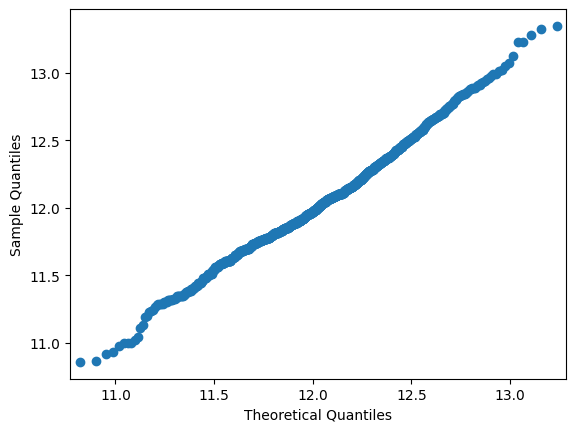

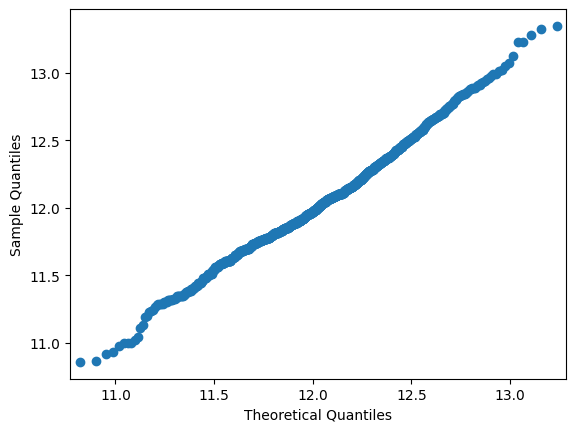

In [156]:
sm.qqplot(y_train, loc=y_train.mean(), scale=y_train.std())

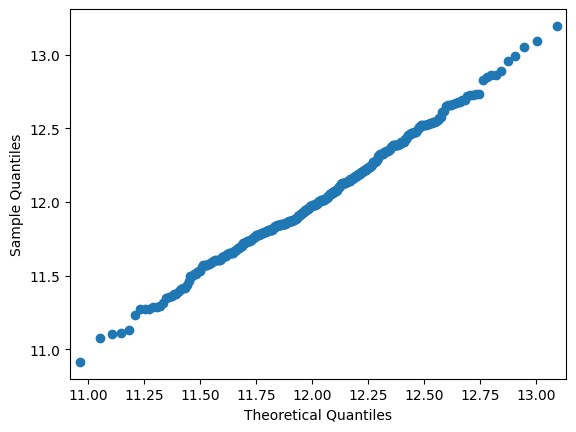

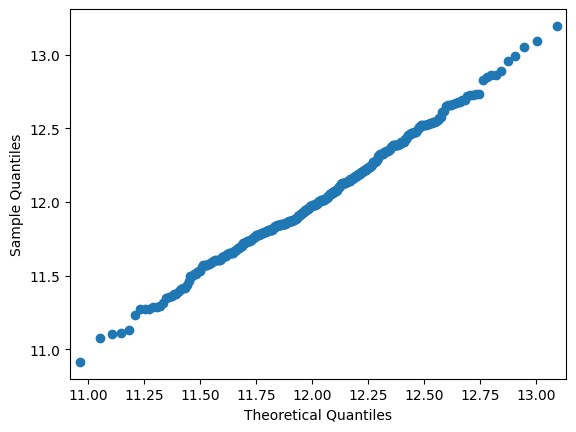

In [157]:
sm.qqplot(y_test, loc=y_test.mean(), scale=y_test.std())

In [158]:
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
model_test = pd.DataFrame(scaler.transform(model_test), columns=model_test.columns)

In [159]:
x_train.head(1)

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,LotShape_IR2,LotShape_IR3,LotShape_Reg,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Zero,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_deny,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_unnown,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No_garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
0,0.006224,-0.802867,-1.486701,-1.678429,-0.580032,-1.00694,-0.70985,-0.796077,-1.448068,-1.009161,-0.775383,-0.954894,0.226904,-1.015556,-0.74804,-0.703624,-0.182227,-0.086026,0.790805,-0.09627,-0.701271,0.774028,-0.881197,-0.892765,-0.114119,-0.074432,-0.042894,-0.173995,-0.861626,1.130594,-0.150117,-0.326661,-0.281578,0.723241,-0.150117,5.656854,-0.45679,-0.030317,-0.64365,-0.129641,-0.052559,-0.030317,0.307364,0.0,-0.168311,-0.801582,0.973715,-1.228502,-0.122113,-0.262097,-0.080433,1.71629,-0.245703,-0.647933,1.075377,-0.182227,-0.105556,-0.245703,19.026298,-2.938906,-0.156394,-0.074432,-0.245703,14.72413,-3.162278,-0.140225,0.294663


In [160]:
model_test.head(1)

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,LotShape_IR2,LotShape_IR3,LotShape_Reg,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Zero,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_deny,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_unnown,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No_garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
0,0.108602,-0.802867,-0.332145,-1.144422,-0.580032,0.070647,-0.429648,-0.796077,-1.233999,-1.009161,-0.775383,-0.954894,0.239515,-1.015556,0.384303,-0.703624,-0.182227,-0.086026,0.790805,-0.09627,-0.701271,0.774028,1.134819,-0.892765,-0.114119,-0.074432,-0.042894,-0.173995,-0.861626,1.130594,-0.150117,-0.326661,-0.281578,0.723241,-0.150117,-0.176777,-0.45679,-0.030317,1.553639,-0.129641,-0.052559,-0.030317,0.307364,0.0,-0.168311,-0.801582,0.973715,0.814,-0.122113,-0.262097,-0.080433,-0.582652,-0.245703,-0.647933,1.075377,-0.182227,-0.105556,-0.245703,-0.052559,0.340263,-0.156394,-0.074432,-0.245703,-0.067916,0.316228,-0.140225,0.294663


In [161]:
y_train.shape, y_test.shape

((1089,), (364,))

In [162]:
x_train.isna().sum().sum(), x_test.isna().sum().sum(), model_test.isna().sum().sum()

(0, 0, 0)

In [163]:
x_train.shape, model_test.shape

((1089, 67), (1459, 67))

### Build ML models

In [164]:
pipeline = Pipeline([
    ('model', None)
])

In [165]:
# Define parameter grids for all models
param_grid = [
    {
        'model': [KNeighborsRegressor()],
        'model__n_neighbors': list(range(3, 11)),
        'model__weights': ['uniform', 'distance']
    },

    {
        'model': [SVR()],
        'model__C': list(range(1, 10)),
        'model__kernel': ['linear', 'rbf', 'poly', 'sigmoid']
    },

    {
        'model': [GradientBoostingRegressor()],
        'model__n_estimators': [100, 150, 200, 250],
        'model__criterion': ['friedman_mse', 'squared_error'],
        'model__learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9]
    },

    {
        'model': [XGBRegressor()],
        'model__max_depth': list(range(1, 9)),
        # 'model__learning_rate': [0.01, 0.1, 0.2],
        'model__booster': ['gbtree', 'gblinear'],
        'model__eta': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9],
        'model__n_estimators':[50, 100, 150, 200, 250]
    }
]


In [166]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose = 0, refit=True, scoring='neg_mean_squared_error')

In [167]:
# pd.options.mode.chained_assignment = None
# Start
grid_search.fit(x_train.to_numpy(), y_train.to_numpy())

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', None)]),
             param_grid=[{'model': [KNeighborsRegressor()],
                          'model__n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],
                          'model__weights': ['uniform', 'distance']},
                         {'model': [SVR()],
                          'model__C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'model__kernel': ['linear', 'rbf', 'poly',
                                            'sigmoid']},
                         {'model': [GradientBoostingRegressor()],
                          'model__criterion': ['frie...
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...)],
                          'model__booster': ['gbtree', 'gblinear'],
                          'model__eta': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9],
                          'model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                          'model__n_estimators': [50, 100, 150, 200, 250]}],
             scoring='neg_mean_squared_error')

In [168]:
grid_search.best_params_

{'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 'model__booster': 'gbtree',
 'model__eta': 0.2,
 'model__max_depth': 2,
 'model__n_estimators': 150}

In [169]:
gs_best_param = grid_search.best_estimator_

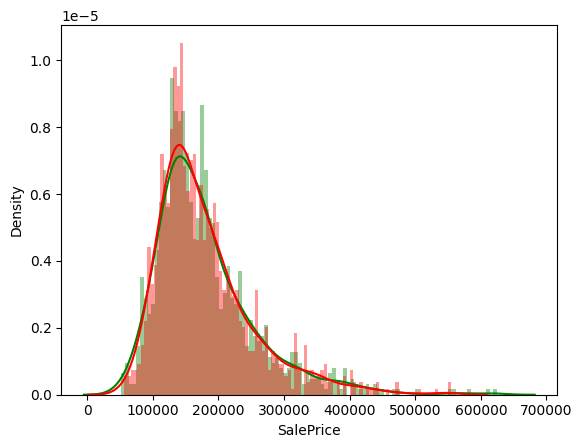

In [170]:
# train
sns.distplot(y_train_non_log, color='g', bins=100, hist_kws={'alpha': 0.4})
sns.distplot(np.exp(gs_best_param.predict(x_train.to_numpy())), color='red', bins=100, hist_kws={'alpha': 0.4});

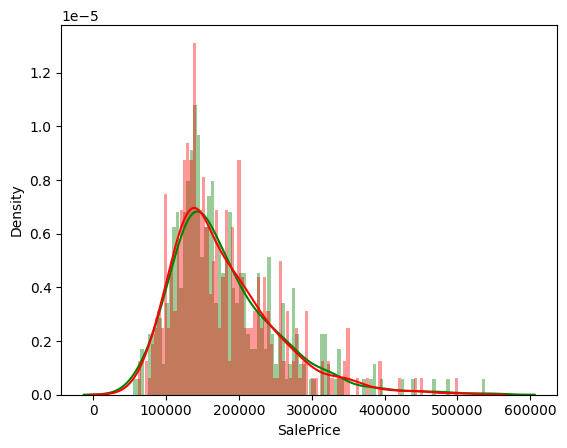

In [171]:
# test
sns.distplot(y_test_non_log, color='g', bins=100, hist_kws={'alpha': 0.4})
sns.distplot(np.exp(gs_best_param.predict(x_test.to_numpy())), color='red', bins=100, hist_kws={'alpha': 0.4});

### Make results_df and metrics_df

In [172]:
results_df = pd.DataFrame(grid_search.cv_results_)

In [173]:
results_df.head(8)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__n_neighbors,param_model__weights,param_model__C,param_model__kernel,param_model__criterion,param_model__learning_rate,param_model__n_estimators,param_model__booster,param_model__eta,param_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000711,0.000285,0.013863,0.021359,KNeighborsRegressor(),3,uniform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'model': KNeighborsRegressor(), 'model__n_nei...",-0.042849,-0.046665,-0.042217,-0.042465,-0.042747,-0.043389,0.001653,487
1,0.000541,0.000072,0.010271,0.008837,KNeighborsRegressor(),3,distance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'model': KNeighborsRegressor(), 'model__n_nei...",-0.043005,-0.045507,-0.042677,-0.042473,-0.041916,-0.043116,0.001247,482
2,0.000660,0.000174,0.006264,0.004731,KNeighborsRegressor(),4,uniform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'model': KNeighborsRegressor(), 'model__n_nei...",-0.043009,-0.045139,-0.041708,-0.042700,-0.041584,-0.042828,0.001280,479
3,0.000625,0.000250,0.003447,0.003057,KNeighborsRegressor(),4,distance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'model': KNeighborsRegressor(), 'model__n_nei...",-0.042562,-0.043948,-0.041629,-0.042076,-0.040871,-0.042217,0.001029,467
4,0.000342,0.000024,0.001046,0.000053,KNeighborsRegressor(),5,uniform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'model': KNeighborsRegressor(), 'model__n_nei...",-0.043272,-0.041645,-0.042059,-0.039694,-0.040822,-0.041499,0.001200,452
5,0.000441,0.000128,0.002092,0.001446,KNeighborsRegressor(),5,distance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'model': KNeighborsRegressor(), 'model__n_nei...",-0.042622,-0.040679,-0.041661,-0.039378,-0.040032,-0.040874,0.001154,436
6,0.000405,0.000071,0.001227,0.000166,KNeighborsRegressor(),6,uniform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'model': KNeighborsRegressor(), 'model__n_nei...",-0.039381,-0.040570,-0.040311,-0.038606,-0.041614,-0.040096,0.001030,412
7,0.000373,0.000026,0.001253,0.000047,KNeighborsRegressor(),6,distance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'model': KNeighborsRegressor(), 'model__n_nei...",-0.038750,-0.039446,-0.039830,-0.038301,-0.040605,-0.039386,0.000808,400


Whrite Funct for this

In [174]:
### Fiynd best models for all

### as newbie im was surprised append method not worck on dataframe, but ok, its not a problem

#### This worck!!!!!!!!!!!!!!!!
def some_fun(df):
    aaa = []
    for x in list(df['param_model'].unique()):
        for e in df[df['mean_test_score'] == df[df['param_model'] == x]['mean_test_score'].max()]. index:
            aaa.append(e)
            
    metrics_df = df.loc[aaa]
    metrics_df = metrics_df.sort_values(by='mean_test_score', ascending=False)
    metrics_df = metrics_df.reset_index(drop=True)
    return metrics_df

In [175]:
metrics_df = some_fun(results_df)

In [176]:
metrics_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__n_neighbors,param_model__weights,param_model__C,param_model__kernel,param_model__criterion,param_model__learning_rate,param_model__n_estimators,param_model__booster,param_model__eta,param_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.031748,0.003896,0.001556,0.000458,"XGBRegressor(base_score=None, booster=None, ca...",NaN,NaN,NaN,NaN,NaN,NaN,150,gbtree,0.2,2,"{'model': XGBRegressor(base_score=None, booste...",-0.016962,-0.020751,-0.026537,-0.015909,-0.014612,-0.018954,0.004309,1
1,0.195288,0.001810,0.000803,0.000077,GradientBoostingRegressor(),NaN,NaN,NaN,NaN,friedman_mse,0.1,100,NaN,NaN,NaN,"{'model': GradientBoostingRegressor(), 'model_...",-0.017638,-0.020868,-0.027462,-0.017998,-0.014818,-0.019757,0.004303,6
2,0.400914,0.101583,0.001503,0.000155,SVR(),NaN,NaN,1,linear,NaN,NaN,NaN,NaN,NaN,NaN,"{'model': SVR(), 'model__C': 1, 'model__kernel...",-0.020642,-0.023683,-0.036555,-0.016224,-0.013443,-0.022109,0.008038,68
3,0.000387,0.000011,0.001376,0.000061,KNeighborsRegressor(),10,distance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'model': KNeighborsRegressor(), 'model__n_nei...",-0.034122,-0.040168,-0.039466,-0.037130,-0.037867,-0.037751,0.002114,361


In [177]:
### Check our work
results_df.iloc[grid_search.best_index_]

mean_fit_time                                                          0.031748
std_fit_time                                                           0.003896
mean_score_time                                                        0.001556
std_score_time                                                         0.000458
param_model                   XGBRegressor(base_score=None, booster=None, ca...
param_model__n_neighbors                                                    NaN
param_model__weights                                                        NaN
param_model__C                                                              NaN
param_model__kernel                                                         NaN
param_model__criterion                                                      NaN
param_model__learning_rate                                                  NaN
param_model__n_estimators                                                   150
param_model__booster                    

everythyng is fine, keep going =)

In [178]:
model_list = []

for i in metrics_df['param_model'].unique():
    model_list.append(i)

In [179]:
model_list[0]

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Bagging

In [180]:
bc_ = BaggingRegressor( random_state=17 )

In [181]:
param_grid_bc = {
    'base_estimator': list(model_list),
    'n_estimators': [10, 25, 50],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9]

}

In [182]:
gs_bc = GridSearchCV(bc_, param_grid_bc, cv=5, refit=True, scoring='neg_mean_squared_error')

In [183]:
gs_bc.fit(x_train.to_numpy(), y_train.to_numpy())

GridSearchCV(cv=5, estimator=BaggingRegressor(random_state=17),
             param_grid={'base_estimator': [XGBRegressor(base_score=None,
                                                         booster=None,
                                                         callbacks=None,
                                                         colsample_bylevel=None,
                                                         colsample_bynode=None,
                                                         colsample_bytree=None,
                                                         device=None,
                                                         early_stopping_rounds=None,
                                                         enable_categorical=False,
                                                         eval_metric=None,
                                                         feature_types=None,
                                                         gamma=None,
                                                         grow_policy=None,
                                                         import...
                                                         max_depth=None,
                                                         max_leaves=None,
                                                         min_child_weight=None,
                                                         missing=nan,
                                                         monotone_constraints=None,
                                                         multi_strategy=None,
                                                         n_estimators=None,
                                                         n_jobs=None,
                                                         num_parallel_tree=None,
                                                         random_state=None, ...),
                                            GradientBoostingRegressor(), SVR(),
                                            KNeighborsRegressor()],
                         'max_features': [0.5, 0.7, 0.9],
                         'max_samples': [0.5, 0.7, 0.9],
                         'n_estimators': [10, 25, 50]},
             scoring='neg_mean_squared_error')

In [184]:
gs_bc.best_params_

{'base_estimator': GradientBoostingRegressor(),
 'max_features': 0.9,
 'max_samples': 0.5,
 'n_estimators': 50}

In [185]:
bc_best_param = gs_bc.best_estimator_

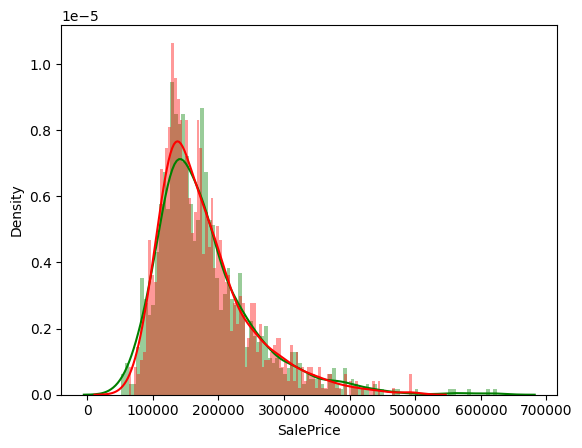

In [186]:
# train
sns.distplot(y_train_non_log, color='g', bins=100, hist_kws={'alpha': 0.4})
sns.distplot(np.exp(bc_best_param.predict(x_train)), color='red', bins=100, hist_kws={'alpha': 0.4});

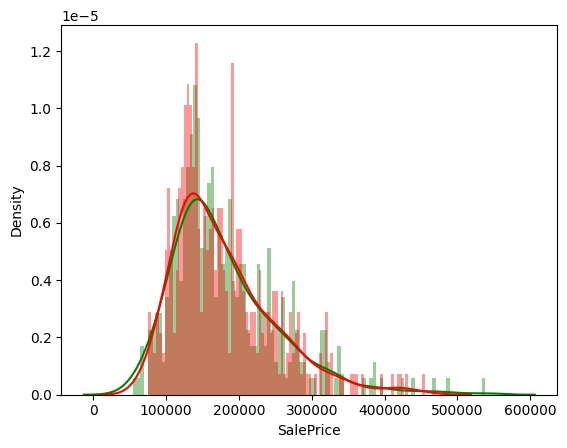

In [187]:
# test
sns.distplot(y_test_non_log, color='g', bins=100, hist_kws={'alpha': 0.4})
sns.distplot(np.exp(bc_best_param.predict(x_test)), color='red', bins=100, hist_kws={'alpha': 0.4});

Voting

estimator KNeighborsRegressor does not support sample weights and in future problems, and also bad score Knn we ignore this model in our Voting model

In [188]:
metrics_df[['param_model', 'mean_test_score']]

,param_model,mean_test_score
0,"XGBRegressor(base_score=None, booster=None, ca...",-0.018954
1,GradientBoostingRegressor(),-0.019757
2,SVR(),-0.022109
3,KNeighborsRegressor(),-0.037751


In [189]:
classifiers_names = ['xgb', 'gb', 'svr']
classifiers = list(model_list[:3])
vr_ = VotingRegressor( estimators = list(zip(classifiers_names, classifiers)))

In [190]:
param_grid_vr_ = {
    'weights': [[0.4, 0.4, 0.2], None, [0.5, 0.3, 0.2], [0.6, 0.2, 0.2], [0.45, 0.45, 0.1], [0.2, 0.6, 0.2]]


}

In [191]:
vr_bc = GridSearchCV(vr_, param_grid_vr_, cv=5, verbose = 0, refit=True, scoring='neg_mean_squared_error')

In [192]:
vr_bc.fit(x_train.to_numpy(), y_train.to_numpy())

GridSearchCV(cv=5,
             estimator=VotingRegressor(estimators=[('xgb',
                                                    XGBRegressor(base_score=None,
                                                                 booster=None,
                                                                 callbacks=None,
                                                                 colsample_bylevel=None,
                                                                 colsample_bynode=None,
                                                                 colsample_bytree=None,
                                                                 device=None,
                                                                 early_stopping_rounds=None,
                                                                 enable_categorical=False,
                                                                 eval_metric=None,
                                                                 feature_types=None,
                                                                 gamma=None,
                                                                 grow_policy=None,
                                                                 importance_type=None,
                                                                 interaction_co...
                                                                 max_leaves=None,
                                                                 min_child_weight=None,
                                                                 missing=nan,
                                                                 monotone_constraints=None,
                                                                 multi_strategy=None,
                                                                 n_estimators=None,
                                                                 n_jobs=None,
                                                                 num_parallel_tree=None,
                                                                 random_state=None, ...)),
                                                   ('gb',
                                                    GradientBoostingRegressor()),
                                                   ('svr', SVR())]),
             param_grid={'weights': [[0.4, 0.4, 0.2], None, [0.5, 0.3, 0.2],
                                     [0.6, 0.2, 0.2], [0.45, 0.45, 0.1],
                                     [0.2, 0.6, 0.2]]},
             scoring='neg_mean_squared_error')

In [193]:
vr_best_param = vr_bc.best_estimator_

In [194]:
vr_bc.best_score_

-0.019546197823912138

before the end lets try Bagging our Voting model

In [195]:
bc3_best = BaggingRegressor( estimator=vr_best_param, random_state=17 )

In [196]:
param_grid_bc3_best = {
    'n_estimators': [10, 25, 50],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9]

}

In [197]:
gs_bc3_best = GridSearchCV(bc3_best, param_grid_bc3_best, cv=5, verbose = 0, refit=True, scoring='neg_mean_squared_error')

In [198]:
gs_bc3_best.fit(x_train.to_numpy(), y_train.to_numpy())

GridSearchCV(cv=5,
             estimator=BaggingRegressor(estimator=VotingRegressor(estimators=[('xgb',
                                                                               XGBRegressor(base_score=None,
                                                                                            booster=None,
                                                                                            callbacks=None,
                                                                                            colsample_bylevel=None,
                                                                                            colsample_bynode=None,
                                                                                            colsample_bytree=None,
                                                                                            device=None,
                                                                                            early_stopping_rounds=None,
                                                                                            enable_categorical=False,
                                                                                            eval_metric=None,
                                                                                            feature_types=None,
                                                                                            gamma=None,
                                                                                            grow_policy=None,
                                                                                            importan...
                                                                                            missing=nan,
                                                                                            monotone_constraints=None,
                                                                                            multi_strategy=None,
                                                                                            n_estimators=None,
                                                                                            n_jobs=None,
                                                                                            num_parallel_tree=None,
                                                                                            random_state=None, ...)),
                                                                              ('gb',
                                                                               GradientBoostingRegressor()),
                                                                              ('svr',
                                                                               SVR())],
                                                                  weights=[0.2,
                                                                           0.6,
                                                                           0.2]),
                                        random_state=17),
             param_grid={'max_features': [0.5, 0.7, 0.9],
                         'max_samples': [0.5, 0.7, 0.9],
                         'n_estimators': [10, 25, 50]},
             scoring='neg_mean_squared_error')

In [199]:
gs_bc3_best_best_param = gs_bc3_best.best_estimator_

In [200]:
gs_bc3_best.best_score_

-0.01920271252404383

### Final

In [201]:
### 1st model
grid_search.best_score_

-0.01895433685235496

In [202]:
### 2nd (only bagging)
gs_bc.best_score_

-0.018638211273077396

In [203]:
### 3d (Voting)
vr_bc.best_score_

-0.019546197823912138

In [204]:
### 4 (Bagging_Voting)
gs_bc3_best.best_score_

-0.01920271252404383

The 2d value is greater, therefore in our task the model with it is better.

In [205]:
global_train = pd.concat([x_train, x_test], ignore_index = True)

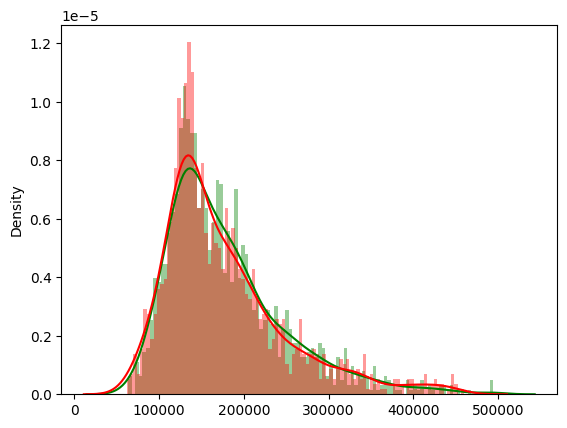

In [206]:
### global_train
sns.distplot(np.exp(bc_best_param.predict(global_train)), color='g', bins=100, hist_kws={'alpha': 0.4});

### model_test
sns.distplot(np.exp(bc_best_param.predict(model_test)), color='red', bins=100, hist_kws={'alpha': 0.4});

In [207]:
model_test['SalePrice'] = np.exp(bc_best_param.predict(model_test))

In [208]:
model_test['SalePrice']

0       124006.978121
1       156128.211940
2       187198.190375
3       185549.222601
4       193254.604273
            ...      
1454     82352.448709
1455     87879.993366
1456    164125.309283
1457    122014.684125
1458    238302.335978
Name: SalePrice, Length: 1459, dtype: float64

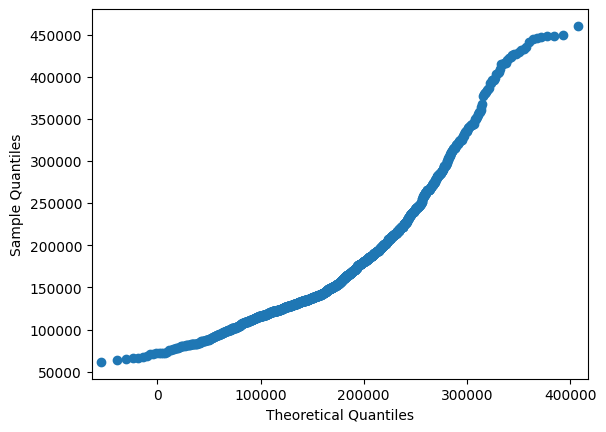

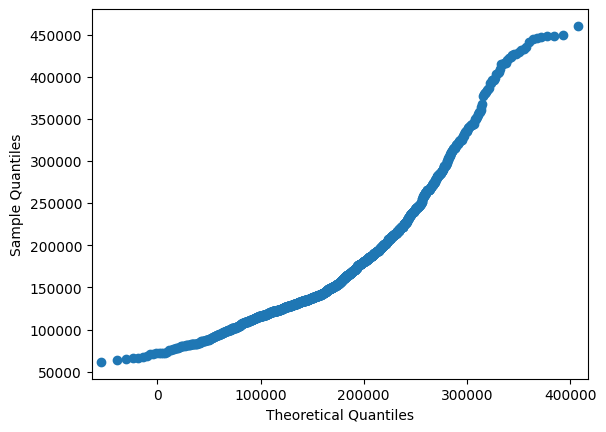

In [209]:
sm.qqplot(model_test['SalePrice'], loc=model_test['SalePrice'].mean(), scale=model_test['SalePrice'].std())

In [210]:
submission_csv = pd.DataFrame({'Id': data_test['Id'], 'SalePrice': model_test['SalePrice']})
# output['SalePrice'] = np.exp(output['SalePrice'])
submission_csv.to_csv('submission.csv', index=False)
# print('Your submission was successfully saved!')
submission_csv.head()

,Id,SalePrice
0,1461,124006.978121
1,1462,156128.211940
2,1463,187198.190375
3,1464,185549.222601
4,1465,193254.604273
